In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Mall_customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Genre']=le.fit_transform(dataset['Genre'])
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [6]:
X=dataset.iloc[:,1:5].values
# adding .values converts the dataset to array

In [7]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [8]:
from sklearn.cluster import KMeans

In [9]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [10]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[308862.06, 212889.44245524297, 143391.5923603568, 104422.8349853975, 75399.61541401484, 58350.65449462819, 51132.7032125769, 44389.807673557676, 40933.109415912644, 37061.44064232065]


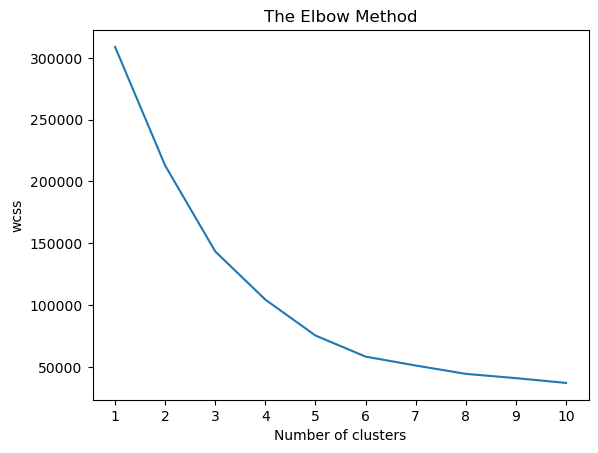

In [11]:
# Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [13]:
y_kmeans=kmeans.fit_predict(X)

In [14]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [15]:
kmeans.predict([[1,30,80,85]])
# Prediction is possible in clustering but evaluation is not possible 
# Predictiong and Evaluation is possible in classification 

array([1], dtype=int32)

In [16]:
y_pred=pd.DataFrame(y_kmeans,columns=['Cluster'])
y_pred

,Cluster
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,2
197,1
198,2


In [17]:
df=pd.concat([dataset,y_pred],axis=1)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


In [18]:
df['Cluster'].value_counts()

3    79
1    39
2    37
0    23
4    22
Name: Cluster, dtype: int64

In [19]:
df[df['Cluster']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,0,31,39,61,3
46,47,0,50,40,55,3
47,48,0,27,40,47,3
48,49,0,29,40,42,3
49,50,0,31,40,42,3
...,...,...,...,...,...,...
119,120,0,50,67,57,3
120,121,1,27,67,56,3
121,122,0,38,67,40,3
122,123,0,40,69,58,3


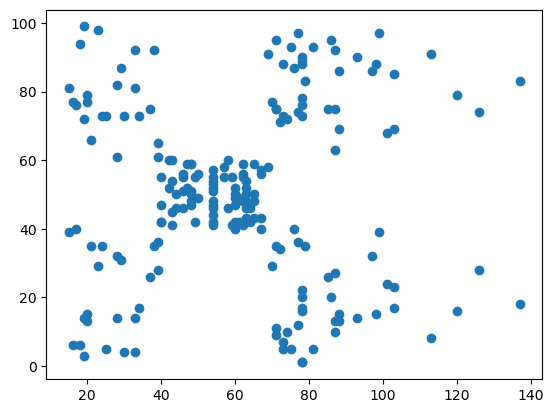

In [20]:
x=dataset.iloc[:,3]
y=dataset.iloc[:,4]
plt.scatter(x,y)

In [21]:
X=dataset.iloc[:,[3,4]].values
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

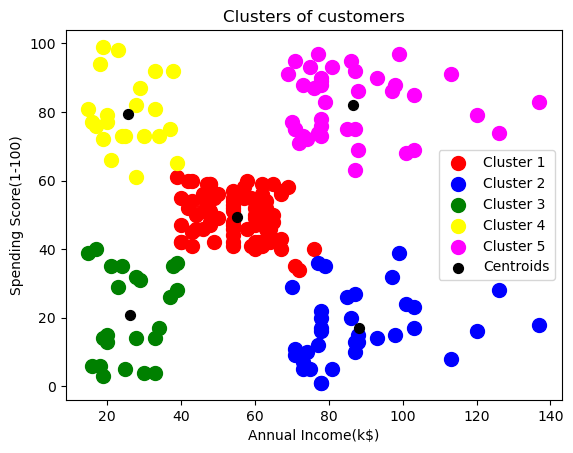

In [22]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],
            s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],
            s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],
            s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],
            s=100,c='yellow',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],
            s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=50,c='black',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()